<h1>FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03</h1>
<p>rev001</p>

<h1>Load modules </h1>

In [40]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

import os
from os.path import expanduser

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib

from IPython.display import display, HTML
print('------------------------------')

------------------------------


<h1>Use settings</h1>
<p>Edit the strings below </p>

In [41]:
dirWorkRelToHome='/OMPythonWork'

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03'
nmModel='LenoirCycleIdeal00_ex03'
stopTime=70.0
outputFormat='csv'
print('------------------------------')

------------------------------


<h1>Setup </h1>

In [42]:
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Linux or Mac (posix)
-. Home directory of current environment is: /home/ubuntu
-. Temporary Working directory is: /home/ubuntu/OMPythonWork

-. Directory of This notebook: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents
-. Directory of library which contains this notebook is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03
-. Full path of Model file to be ran is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/FluidSystemComponents/CommonAnyFluid/Examples/Thermodynamics/LenoirCycleIdeal00_ex03.mo

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents
------

In [43]:
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#-- load Modelica Standard Library
msgOMShell=omc.sendExpression("loadModel(Modelica)")
print("OMShell: "+ str(msgOMShell)); print('')

print('...loading custom libraries, wait...')
for i in range(len(libs2load)):
    #-- load PropulsionSystem library
    print('i='+str(i))
    strcmd='loadFile("' + str(dirLib) +'/'+ libs2load[i] +'/package.mo' + '")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...load of custom libraries is completed')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork
OMShell: True

...loading custom libraries, wait...
i=0
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/PropulsionSystem/package.mo")
OMShell: True
i=1
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/FluidSystemComponents/package.mo")
OMShell: True
i=2
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/WalkingInWorldOfThermoFluid/package.mo")
OMShell: True
i=3
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/AircraftDynamics/package.mo")
OMShell: True
i=4
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/SystemModels/package.mo")
OMShell: True
i=5
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/InteractiveSimulation/package.mo")
OMShell: True
...load of custom libraries is 

<h1>Building Model</h1>

In [44]:
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
print(''); print('...moving OMshell to temporary working directry')
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#-- build the model
print(''); print('...building the model, wait...')
strcmd= 'buildModel(' + fullpathModel + ', stopTime='+str(stopTime) + ', outputFormat="csv"' + ')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...model build finished.')

#-- save original parameter setting file
print(''); print('...Saving original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (fullpathModel+'_init_org.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------


...moving OMshell to temporary working directry
send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...building the model, wait...
send: buildModel(FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03, stopTime=70.0, outputFormat="csv")
OMShell: ('/home/ubuntu/OMPythonWork/FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03', 'FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml')
...model build finished.

...Saving original parameter setting file...
send: system("cp FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init_org.xml")
OMShell: 0

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/mod

<h1>Print source code of model built</h1>

In [45]:
#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

strcmd= 'list('+fullpathModel+')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print('source code of model build:')
print('')
print(str(msgOMShell)); 

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: list(FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03)
source code of model build:

model LenoirCycleIdeal00_ex03
  extends Modelica.Icons.Example;
  //-----
  package cycleFluid = Modelica.Media.CompressibleLiquids.LinearColdWater;
  //redeclare package Medium = cycleFluid
  //-----
  Modelica.Blocks.Sources.Ramp ramp_Q(duration = 10, height = 100 * 1000, offset = 100 * 1000, startTime = 10) annotation(
    Placement(visible = true, transformation(origin = {-90, 30}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Sources.Ramp ramp_VolFluid(duration = 10, height = 0, offset = 0.001, startTime = 10) annotation(
    Placement(visible = true, transformation(origin = {-30, 70}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Sources.Ramp ramp_p_in(duration = 10, height = 0, offset = 101.325 * 1000, startTime = 10) annotation(
    Placemen

<h1>Run simulation, default setting</h1>

In [46]:
stopTime=70

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- reset _init.xml
print('...calling original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

#-- run simulation with default parameter setting
print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res.csv' +'")'
##### end if #####
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

...calling original parameter setting file...
send: system("cp FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init_org.xml FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml")
OMShell: 0

...running simulation, wait...
send: system("./FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03 -override stopTime=70 -r=FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res.csv")
OMShell: 0
...simulation run finished.

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents
------------------------------


<h1>Run simulation</h1>
<h2>parameter sweep, 1 parameter </h2>

In [47]:
#****************************************
#    User Setting section 
#****************************************
iRunBegin=2
iRunEnd=3
param2change="ramp_Q.offset"
valBegin=100*1000
deltaVal=100*1000
stopTime=70.0

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(iRunBegin, iRunEnd+1):
    iRun=i
    value2set=valBegin+(i-1)*deltaVal
    filenameXmlOrg=fullpathModel+'_init_org.xml'
    filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
    
    print(''); print('-----')
    print('iRun= '+ str(iRun))
    
    #-- overwrite parameter setting xml file
    print('...Overwriting parameter setting file...')
    strcmd= 'setInitXmlStartValue("' + filenameXmlOrg+'", '+ '"'+param2change+'", ' + '"'+str(value2set)+'", '+ '"'+fullpathModel+'_init.xml"' +')'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- save parameter setting file after overwriting
    print(''); print('...Saving parameter setting file...')
    strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- run simulation with default parameter setting
    print(''); print("...running simulation, wait...")
    if(os.name=='nt'):
        strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
    elif(os.name=='posix'):
        strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
    ##### end if #####

    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
    print('...simulation run finished.')
##### end for #####

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------


-----
iRun= 2
...Overwriting parameter setting file...
send: setInitXmlStartValue("FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init_org.xml", "ramp_Q.offset", "200000", "FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml")
OMShell: True

...Saving parameter setting file...
send: system("cp FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init_2.xml")
OMShell: 0

...running simulation, wait...
send: system("./FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03 -override stopTime=70.0 -r=FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res_2.csv")
OMShell: 0
...simulation run finished.

-----
iRun= 3
...Overwriting parameter setting file..

<h1>Run simulation</h1>
<h2>Change multiple parameters </h2>

In [48]:
#****************************************
#    User Setting section 
#****************************************
iRun=1
param2change=[
    'ramp_Q.height', 'ramp_Q.startTime',
    'ramp_T_in.offset', 'ramp_T_in.height', 'ramp_T_in.startTime',
]

value2set=[
    500*1000, 10.0,
    288.15-10, 0.0, 30.0,
]
stopTime=70.0

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
#-- reset _init.xml
print('iRun='+str(iRun))
print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

print('...editing parameter setting file, wait...')
for i in range(len(param2change)):
    #----------
    #-- overwrite parameter setting xml file
    #- index 0
    print('i='+str(i))
    strcmd= 'setInitXmlStartValue("' +(fullpathModel+'_init.xml')+'", '+ '"'+param2change[i]+'", ' + '"'+str(value2set[i])+'", '+ '"'+(fullpathModel+'_init.xml')+'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...edit of parameter setting file is completed.')

#----------
#-- save parameter setting file after overwriting
print(''); print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#-- run simulation
print(''); print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
##### end if #####

print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

iRun=1
...Saving parameter setting file...
send: system("cp FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init_org.xml FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml")
OMShell: 0

...editing parameter setting file, wait...
i=0
send: setInitXmlStartValue("FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml", "ramp_Q.height", "500000", "FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml")
OMShell: True
i=1
send: setInitXmlStartValue("FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml", "ramp_Q.startTime", "10.0", "FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_init.xml")
OMShell: True
i=2
send: setInitXmlStartValue("FluidSystemComponents.CommonAnyFluid.Examples.Thermodyn

<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process</h1>

In [49]:
n_df=100
df=[[]]*n_df
i_df= -1
print('----------')

----------


<h2>Read csv, case of default parameter setting</h2>

In [50]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents


,time,$cse1.T,$cse1.p,$cse10.T,$cse10.p,$cse11.T,$cse11.p,$cse12.T,$cse12.p,$cse2.T,...,LenoirCycle.v[3],LenoirCycle.y_T_fluidState_3,LenoirCycle.y_WoutCycle,LenoirCycle.y_h_fluidState_3,LenoirCycle.y_p_fluidState_3,LenoirCycle.y_u_fluidState_3,ramp_Q.y,ramp_T_in.y,ramp_VolFluid.y,ramp_p_in.y
0,0.00,288.15,101325,312.141884,101325,312.440976,1.393385e+07,312.141884,101325,290.632066,...,0.001012,312.141884,14054.065810,247079.660020,101325,246977.139161,100000.0,288.15,0.001,101325
1,0.14,288.15,101325,312.141884,101325,312.440976,1.393385e+07,312.141884,101325,290.632066,...,0.001012,312.141884,14054.065810,247079.660020,101325,246977.139161,100000.0,288.15,0.001,101325
2,0.28,288.15,101325,312.141884,101325,312.440976,1.393385e+07,312.141884,101325,290.632066,...,0.001012,312.141884,14054.065810,247079.660020,101325,246977.139161,100000.0,288.15,0.001,101325
3,0.42,288.15,101325,312.141884,101325,312.440976,1.393385e+07,312.141884,101325,290.632066,...,0.001012,312.141884,14054.065810,247079.660020,101325,246977.139161,100000.0,288.15,0.001,101325
4,0.56,288.15,101325,312.141884,101325,312.440976,1.393385e+07,312.141884,101325,290.632066,...,0.001012,312.141884,14054.065810,247079.660020,101325,246977.139161,100000.0,288.15,0.001,101325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.58,288.15,101325,336.037908,101325,336.731952,2.776638e+07,336.037908,101325,292.786021,...,0.001018,336.037908,28506.800432,347010.440895,101325,346907.280590,200000.0,288.15,0.001,101325
502,69.72,288.15,101325,336.037908,101325,336.731952,2.776638e+07,336.037908,101325,292.786021,...,0.001018,336.037908,28506.800432,347010.440895,101325,346907.280590,200000.0,288.15,0.001,101325
503,69.86,288.15,101325,336.037908,101325,336.731952,2.776638e+07,336.037908,101325,292.786021,...,0.001018,336.037908,28506.800432,347010.440895,101325,346907.280590,200000.0,288.15,0.001,101325
504,70.00,288.15,101325,336.037908,101325,336.731952,2.776638e+07,336.037908,101325,292.786021,...,0.001018,336.037908,28506.800432,347010.440895,101325,346907.280590,200000.0,288.15,0.001,101325


<h1> list of columns on csv </h1>

In [51]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 '$cse1.T',
 '$cse1.p',
 '$cse10.T',
 '$cse10.p',
 '$cse11.T',
 '$cse11.p',
 '$cse12.T',
 '$cse12.p',
 '$cse2.T',
 '$cse2.p',
 '$cse3.T',
 '$cse3.p',
 '$cse4.T',
 '$cse4.p',
 '$cse5.T',
 '$cse5.p',
 '$cse6.T',
 '$cse6.p',
 '$cse7.T',
 '$cse7.p',
 '$cse8.T',
 '$cse8.p',
 '$cse9.T',
 '$cse9.p',
 'LenoirCycle.ER_3_2',
 'LenoirCycle.PR_2_1',
 'LenoirCycle.Q_3_1',
 'LenoirCycle.Vol[1]',
 'LenoirCycle.WoutCycle',
 'LenoirCycle.arr_T[2]',
 'LenoirCycle.arr_T[3]',
 'LenoirCycle.arr_T[4]',
 'LenoirCycle.arr_V[3]',
 'LenoirCycle.arr_h[2]',
 'LenoirCycle.arr_h[3]',
 'LenoirCycle.arr_h[4]',
 'LenoirCycle.arr_p[2]',
 'LenoirCycle.arr_p[4]',
 'LenoirCycle.arr_u[2]',
 'LenoirCycle.arr_u[3]',
 'LenoirCycle.arr_u[4]',
 'LenoirCycle.arr_v[2]',
 'LenoirCycle.arr_v[3]',
 'LenoirCycle.arr_v[4]',
 'LenoirCycle.curve_Ts[1].TLower',
 'LenoirCycle.curve_Ts[2].TLower',
 'LenoirCycle.curve_Ts[3].TLower',
 'LenoirCycle.curve_Ts[1].TUpper',
 'LenoirCycle.curve_Ts[2].TUpper',
 'LenoirCycle.curve_Ts[3].TUpp

<h1>Read csv, array, specify start and end</h1>

In [52]:
i_df_begin=2
i_df_end=3


#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(i_df_begin, i_df_end+1):
    i_df=i
    print('i_df='+str(i_df))
    nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
    print("data read: "+ os.getcwd()+"/"+nmcsv)
    df.insert(i_df, pd.read_csv(nmcsv))
##### end for #####
    
#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())


currend dir: /home/ubuntu/OMPythonWork
------------------------------

i_df=2
data read: /home/ubuntu/OMPythonWork/FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res_2.csv
i_df=3
data read: /home/ubuntu/OMPythonWork/FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res_3.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents


<h1>Read csv, selected case#</h1>

In [53]:
i_df=1

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/FluidSystemComponents.CommonAnyFluid.Examples.Thermodynamics.LenoirCycleIdeal00_ex03_res_1.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/FluidSystemComponents


,time,$cse1.T,$cse1.p,$cse10.T,$cse10.p,$cse11.T,$cse11.p,$cse12.T,$cse12.p,$cse2.T,...,LenoirCycle.v[3],LenoirCycle.y_T_fluidState_3,LenoirCycle.y_WoutCycle,LenoirCycle.y_h_fluidState_3,LenoirCycle.y_p_fluidState_3,LenoirCycle.y_u_fluidState_3,ramp_Q.y,ramp_T_in.y,ramp_VolFluid.y,ramp_p_in.y
0,0.00,278.15,101325,302.090591,101325,302.369902,1.389338e+07,302.090591,101325,280.621015,...,0.001009,302.090591,13970.239418,205046.158814,101325,204943.904559,100000.0,278.15,0.001,101325
1,0.14,278.15,101325,302.090591,101325,302.369902,1.389338e+07,302.090591,101325,280.621015,...,0.001009,302.090591,13970.239418,205046.158814,101325,204943.904559,100000.0,278.15,0.001,101325
2,0.28,278.15,101325,302.090591,101325,302.369902,1.389338e+07,302.090591,101325,280.621015,...,0.001009,302.090591,13970.239418,205046.158814,101325,204943.904559,100000.0,278.15,0.001,101325
3,0.42,278.15,101325,302.090591,101325,302.369902,1.389338e+07,302.090591,101325,280.621015,...,0.001009,302.090591,13970.239418,205046.158814,101325,204943.904559,100000.0,278.15,0.001,101325
4,0.56,278.15,101325,302.090591,101325,302.369902,1.389338e+07,302.090591,101325,280.621015,...,0.001009,302.090591,13970.239418,205046.158814,101325,204943.904559,100000.0,278.15,0.001,101325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,69.58,278.15,101325,420.204691,101325,423.469413,8.285364e+07,420.204691,101325,289.005719,...,0.001041,420.204691,90446.276599,698987.511689,101325,698882.034169,600000.0,278.15,0.001,101325
506,69.72,278.15,101325,420.204691,101325,423.469413,8.285364e+07,420.204691,101325,289.005719,...,0.001041,420.204691,90446.276599,698987.511689,101325,698882.034169,600000.0,278.15,0.001,101325
507,69.86,278.15,101325,420.204691,101325,423.469413,8.285364e+07,420.204691,101325,289.005719,...,0.001041,420.204691,90446.276599,698987.511689,101325,698882.034169,600000.0,278.15,0.001,101325
508,70.00,278.15,101325,420.204691,101325,423.469413,8.285364e+07,420.204691,101325,289.005719,...,0.001041,420.204691,90446.276599,698987.511689,101325,698882.034169,600000.0,278.15,0.001,101325


In [54]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

------------------------------


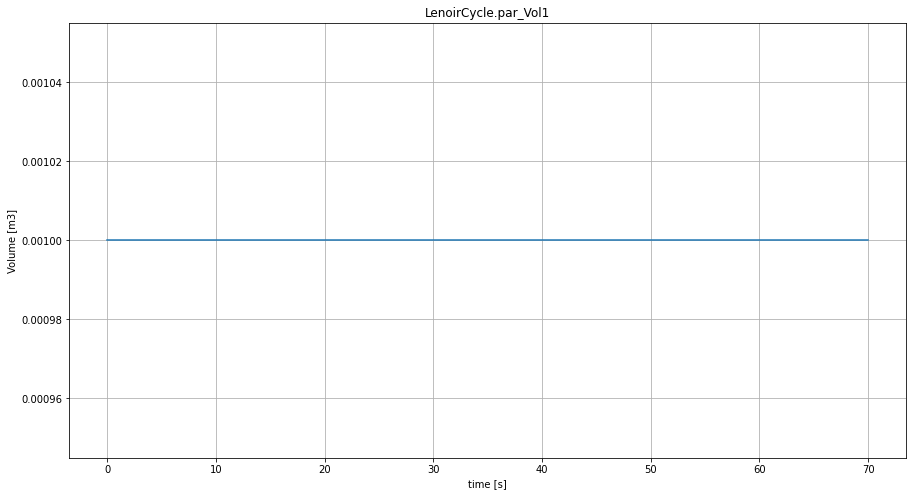

In [55]:
i_df=1
varName="LenoirCycle.par_Vol1"
ylabel='Volume [m3]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


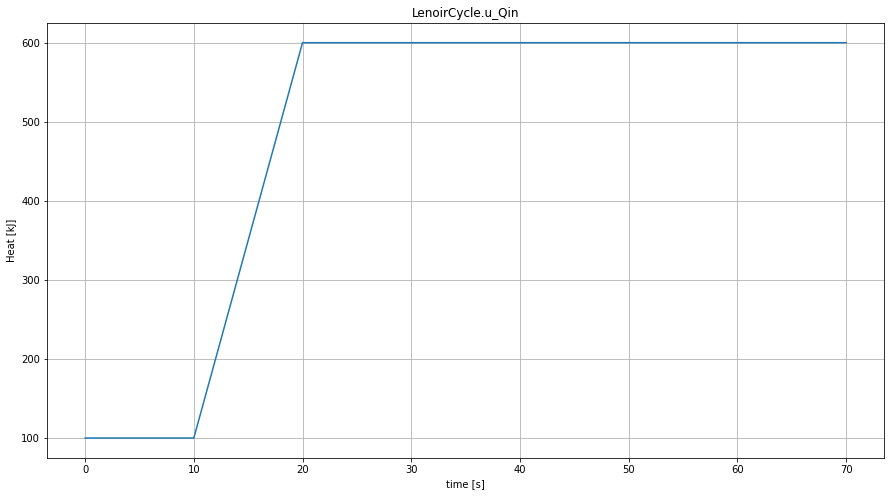

In [56]:
i_df=1
varName="LenoirCycle.u_Qin"
ylabel='Heat [kJ]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000.0
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


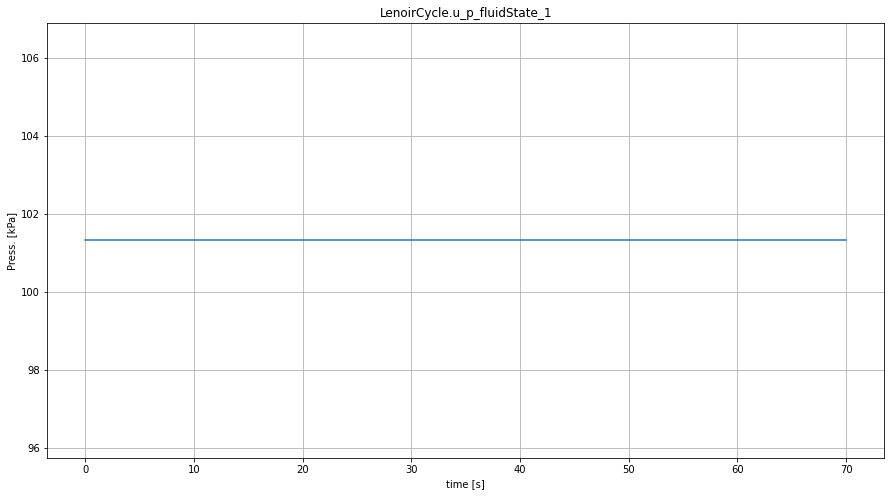

In [57]:
i_df=1
varName="LenoirCycle.u_p_fluidState_1"
ylabel='Press. [kPa]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000.0
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


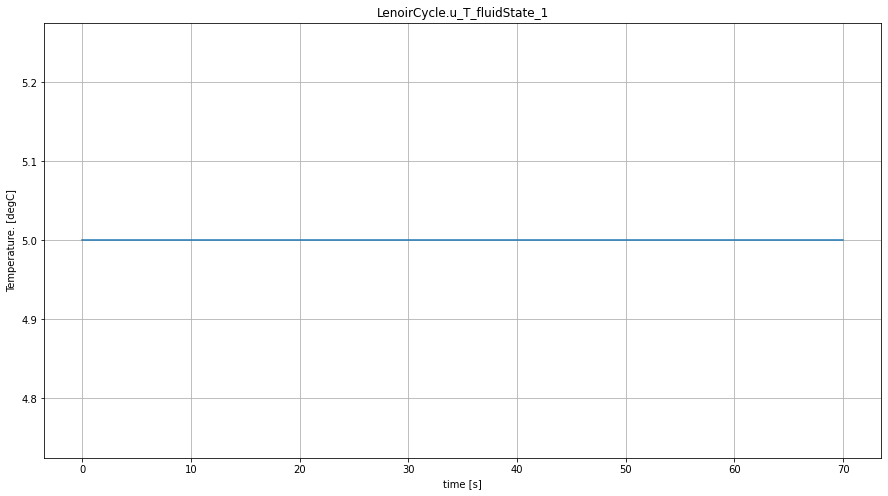

In [58]:
i_df=1
varName="LenoirCycle.u_T_fluidState_1"
ylabel='Temperature. [degC]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]-273.15
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

<h2>Simulation Results; Outputs</h2>

------------------------------


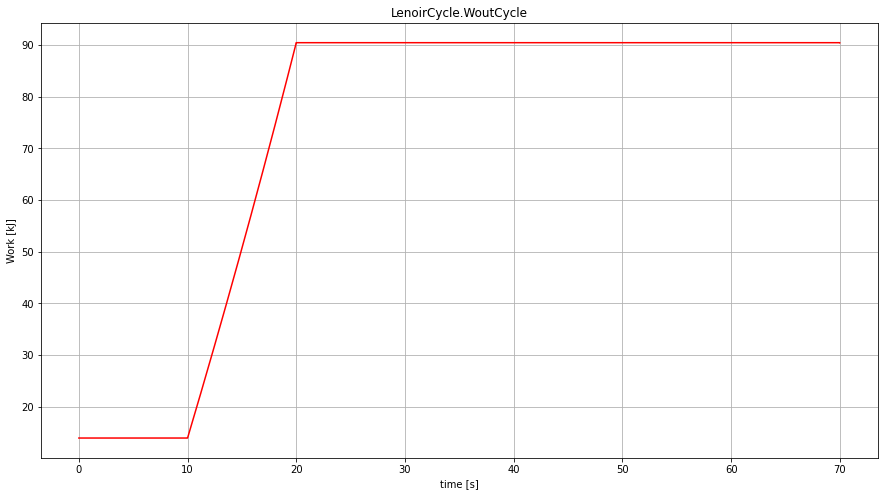

In [59]:
i_df=1
varName="LenoirCycle.WoutCycle"
ylabel='Work [kJ]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000.0
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


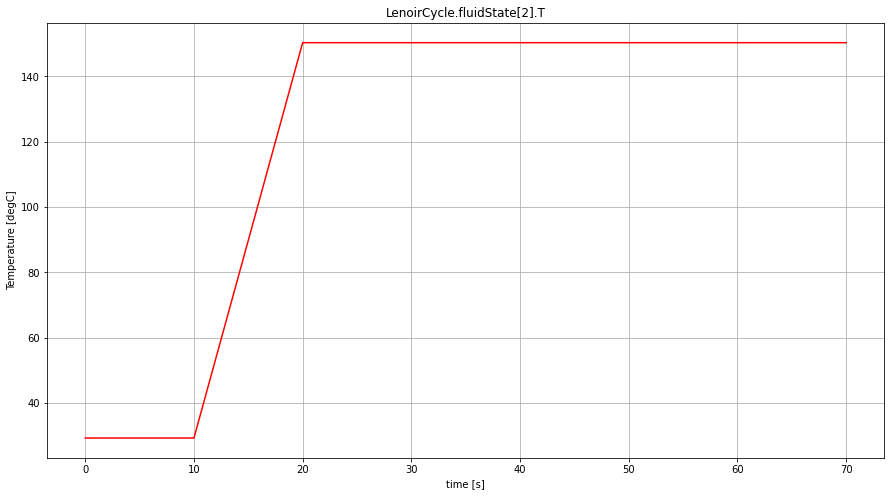

In [65]:
i_df=1
varName="LenoirCycle.fluidState[2].T"
ylabel='Temperature [degC]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]-273.15
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


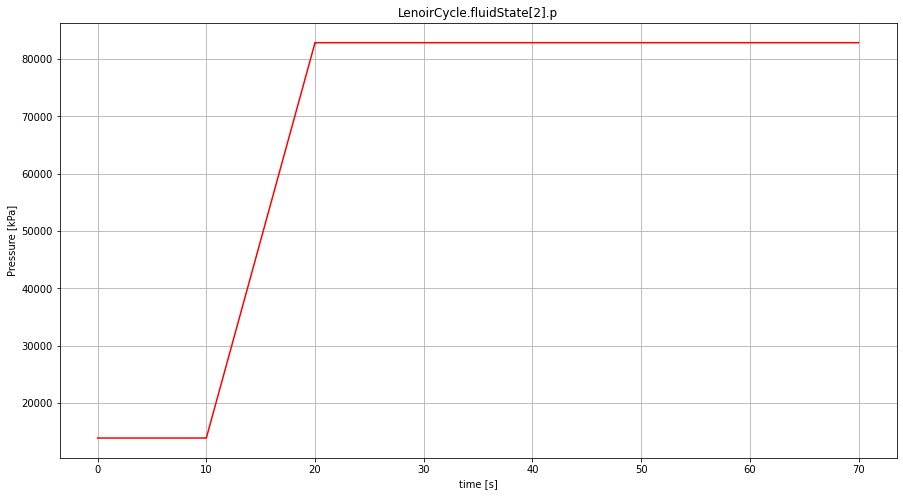

In [68]:
i_df=1
varName="LenoirCycle.fluidState[2].p"
ylabel='Pressure [kPa]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000.0
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


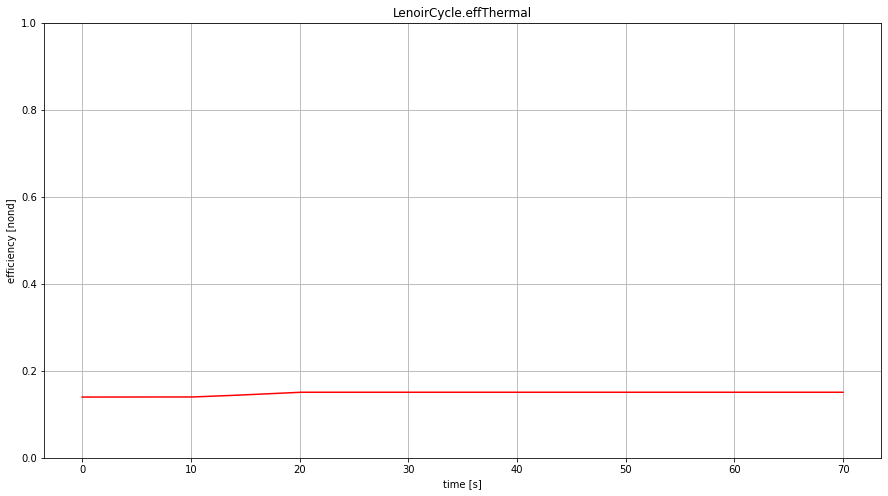

In [69]:
i_df=1
varName="LenoirCycle.effThermal"
ylabel='efficiency [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')
plt.ylim(0.0, 1.0)

plt.grid()
print('------------------------------')

------------------------------


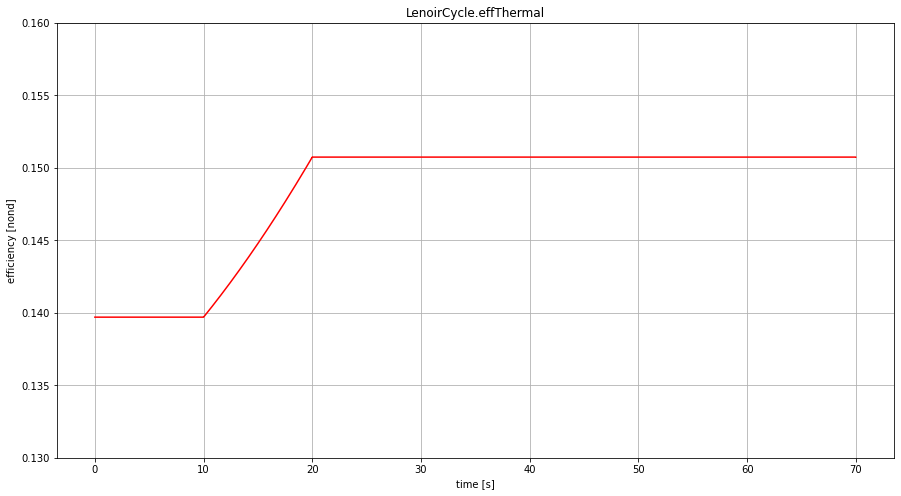

In [70]:
i_df=1
varName="LenoirCycle.effThermal"
ylabel='efficiency [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')
plt.ylim(0.13, 0.16)

plt.grid()
print('------------------------------')

<h1>Extract variables at specified time</h1>

In [71]:
i_df=1
tgtTime=70
widthTime=1

#******************************
#*** find the row of target time ***
rowTgt=0
for i in range(len(df[i_df])):
    if((tgtTime-widthTime <= df[i_df].at[i,'time']) and (df[i_df].at[i,'time'] <= tgtTime) ):
        rowTgt=i
        timeExtrd=df[i_df].at[i,'time']
    ##### end if #####
##### end for #####

print("row extracted = "+str(rowTgt))
print("time of extracted = "+str(timeExtrd))
print("")

arr_h=[]
arr_s=[]
arr_v=[]
arr_T=[]
arr_u=[]

nStates=4
componentName='LenoirCycle'

for i in range(1,nStates+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, (componentName+'.arr_h['+str(i)+']')]
    arr_h.append(val)
    val= df[i_df].at[rowTgt, (componentName+'.arr_s['+str(i)+']')]
    arr_s.append(val)
    val= df[i_df].at[rowTgt, (componentName+'.arr_v['+str(i)+']')]
    arr_v.append(val)
    val= df[i_df].at[rowTgt, (componentName+'.arr_T['+str(i)+']')]
    arr_T.append(val)
    val= df[i_df].at[rowTgt, (componentName+'.arr_u['+str(i)+']')]
    arr_u.append(val)
##### end for #####

arr_V=[]
arr_p=[]
for i in range(1, nStates+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, (componentName+'.arr_p['+str(i)+']')]
    arr_p.append(val)
    val= df[i_df].at[rowTgt, (componentName+'.arr_V['+str(i)+']')]
    arr_V.append(val)
##### end for #####

print("arr_p= "+str(arr_p))
print("arr_V= "+str(arr_V))
print("")

nPts= df[i_df].at[rowTgt, (componentName+'.curve_hs[1].nPts')]
print("nPts of process curve array= "+str(nPts))

s_curve_hs=[[]]*nStates; h_curve_hs=[[]]*nStates
v_curve_pv=[[]]*nStates; p_curve_pv=[[]]*nStates
s_curve_Ts=[[]]*nStates; T_curve_Ts=[[]]*nStates
s_curve_us=[[]]*nStates; u_curve_us=[[]]*nStates
V_curve_pVol=[[]]*nStates; p_curve_pVol=[[]]*nStates

arrTemp_s_hs=[]; arrTemp_h_hs=[]
arrTemp_s_Ts=[]; arrTemp_T_Ts=[]
arrTemp_s_us=[]; arrTemp_u_us=[]
arrTemp_v_pv=[]; arrTemp_p_pv=[]
arrTemp_V_pVol=[]; arrTemp_p_pVol=[]

for j in range(1, nStates):
    for i in range(1, nPts+1):
        # ***** extract specified variables of target row *****
        val=df[i_df].at[rowTgt, (componentName+'.curve_hs['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_hs.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_hs['+str(j)+'].arr_h['+str(i)+']')]; arrTemp_h_hs.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_Ts['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_Ts.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_Ts['+str(j)+'].arr_T['+str(i)+']')]; arrTemp_T_Ts.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_us['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_us.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_us['+str(j)+'].arr_u['+str(i)+']')]; arrTemp_u_us.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_pv['+str(j)+'].arr_v['+str(i)+']')]; arrTemp_v_pv.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_pv['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pv.append(val)
        
        val=df[i_df].at[rowTgt, (componentName+'.curve_pVol['+str(j)+'].arr_V['+str(i)+']')]; arrTemp_V_pVol.append(val)
        val=df[i_df].at[rowTgt, (componentName+'.curve_pVol['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pVol.append(val)
    ##### end for #####
    
    s_curve_hs[j-1]=arrTemp_s_hs; arrTemp_s_hs=[]
    h_curve_hs[j-1]=arrTemp_h_hs; arrTemp_h_hs=[]
    s_curve_Ts[j-1]=arrTemp_s_Ts; arrTemp_s_Ts=[]
    T_curve_Ts[j-1]=arrTemp_T_Ts; arrTemp_T_Ts=[]
    s_curve_us[j-1]=arrTemp_s_us; arrTemp_s_us=[]
    u_curve_us[j-1]=arrTemp_u_us; arrTemp_u_us=[]
    v_curve_pv[j-1]=arrTemp_v_pv; arrTemp_v_pv=[]
    p_curve_pv[j-1]=arrTemp_p_pv; arrTemp_p_pv=[]
    
    V_curve_pVol[j-1]=arrTemp_V_pVol; arrTemp_V_pVol=[]
    p_curve_pVol[j-1]=arrTemp_p_pVol; arrTemp_p_pVol=[]
##### end for #####
print('------------------------------')

row extracted = 509
time of extracted = 70.0

arr_p= [101325, 82853640.67894898, 101325, 101325]
arr_V= [0.001, 0.001, 0.0010379112902625, 0.001]

nPts of process curve array= 10
------------------------------


------------------------------


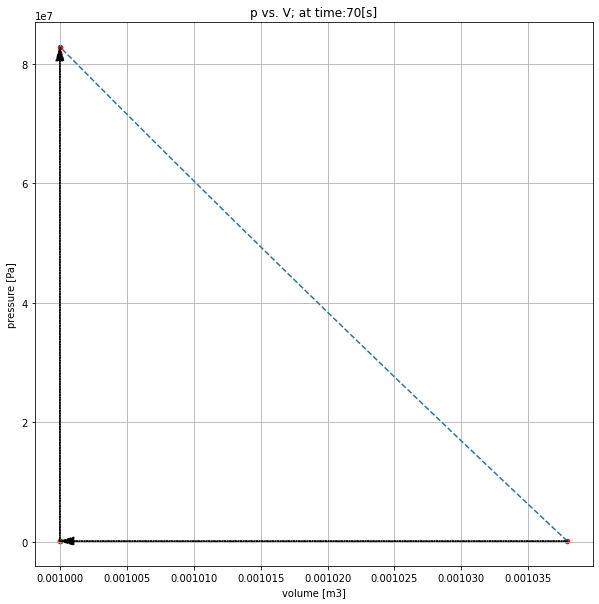

In [73]:
fig.append(plt.figure(figsize=(10,10)))
nStates=3
for i in range(nStates):
    if((i==2-1)):
        plt.plot(V_curve_pVol[i], p_curve_pVol[i], linestyle='dashed')
##### end for #####

plt.grid()
plt.title('p vs. V'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('volume [m3]')
plt.ylabel('pressure [Pa]')

for i in range(0, nStates):
    if((i==0)or(i==2)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
##### end for #####

plt.scatter(x=arr_V, y=arr_p, color='red', s=20)

print('------------------------------')

------------------------------


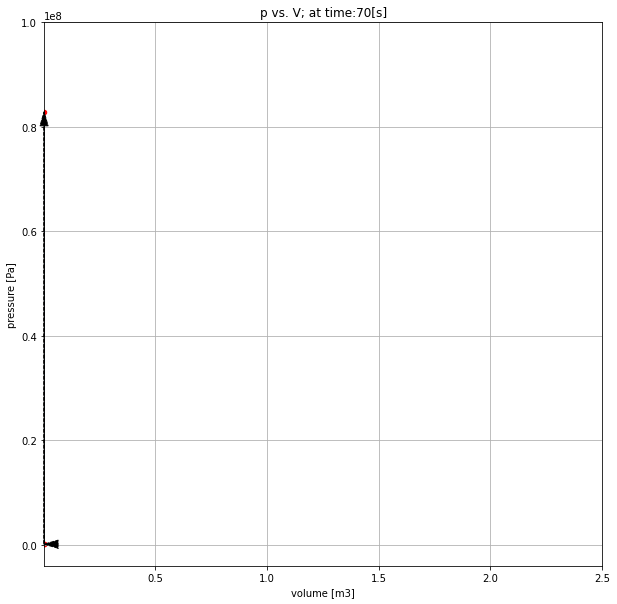

In [74]:
fig.append(plt.figure(figsize=(10,10)))
nStates=3
for i in range(nStates):
    if((i==2-1)):
        plt.plot(V_curve_pVol[i], p_curve_pVol[i], linestyle='dashed')
##### end for #####

plt.grid()
plt.title('p vs. V'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('volume [m3]')
plt.ylabel('pressure [Pa]')

for i in range(0, nStates):
    if((i==0)or(i==2)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
##### end for #####

plt.scatter(x=arr_V, y=arr_p, color='red', s=20)
plt.xlim(right=2.5)
plt.ylim(top=1e8)

print('------------------------------')

------------------------------


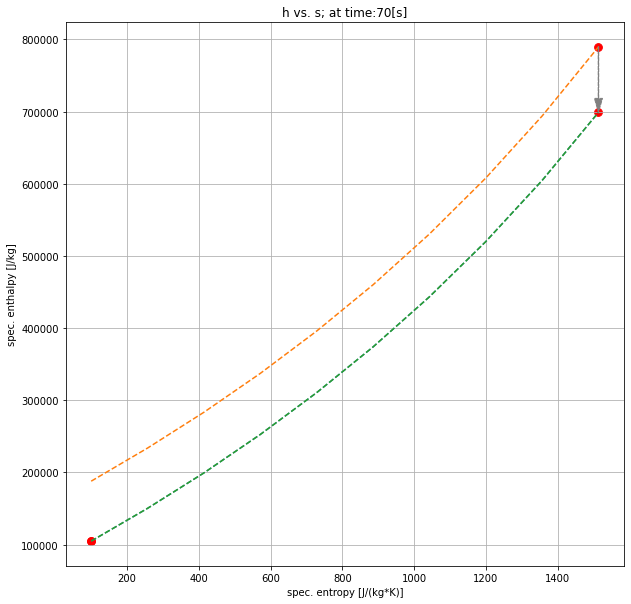

In [75]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_h, color='red', s=60)

for i in range(0, 3):
    plt.plot(s_curve_hs[i], h_curve_hs[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('h vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. enthalpy [J/kg]')
for i in range(0, 3):
    if((i==2-1)):
        plt.annotate('', xy=[arr_s[i+1],arr_h[i+1]], xytext=[arr_s[i],arr_h[i]],
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
''''''
print('------------------------------')

------------------------------


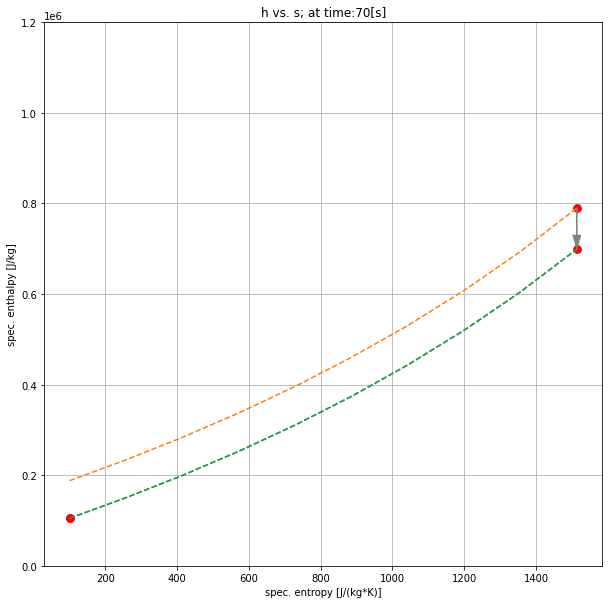

In [76]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_h, color='red', s=60)

for i in range(0, 3):
    plt.plot(s_curve_hs[i], h_curve_hs[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('h vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. enthalpy [J/kg]')
for i in range(0, 3):
    if((i==2-1)):
        plt.annotate('', xy=[arr_s[i+1],arr_h[i+1]], xytext=[arr_s[i],arr_h[i]],
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####

plt.ylim(bottom=0.0, top=1.2e6)

print('------------------------------')

<h1>Process at the end of note</h1>

In [506]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib
------------------------------
